# 친환경자동차 등록 대수 현황 및 친환경자동차 충전소 시각화

> 충전 와트수에 따른 충전시간 비교

> 전기차 등록 대수에 따른 성장률 예측

> 입력받아 지역을 검색할지?

> 여름 겨울 배터리 수명

> 검색한 지역에 충전이 가능한 곳 Marker 표시

In [33]:
import pandas as pd
import folium
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2021 지역별 전기차 현황 데이터

In [34]:
df = pd.read_csv('/content/한국전력공사_지역별 전기차 현황정보_20220429.csv', encoding='cp949')

In [35]:
#합계를 이용해서 성장률 예측
df_change = df.rename(columns = {'서울': '서울특별시', '인천': '인천광역시',
                     '경기': '경기도', '강원': '강원도',
                     '충북':'충청북도', '충남': '충청남도',
                     '대전': '대전광역시', '세종': '세종특별자치시',
                     '경북': '경상북도', '대구': '대구광역시',
                     '전북': '전라북도', '전남': '전라남도',
                     '광주': '광주광역시','경남': '경상남도',
                     '부산': '부산광역시', '울산': '울산광역시',
                     '제주':'제주특별자치도'})
df_change.drop(['합계'],axis=1, inplace=True)

df_change = df_change[df_change['기준일'].between('2021-01-01','2021-12-01')]

df_change = df_change.transpose().rename(columns=df_change.iloc[0])
df_change = df_change.drop(df_change.index[0])

df_change['합계'] = df_change.sum(axis = 1).astype('int64')

g_geo = '/content/전국행정구역경계.json'
electric_vehicle_status_map = folium.Map(location = [35.907757, 127.766922], tiles='Stamen Terrain', zoom_start=6)

df_change.reset_index(inplace=True)

df_change.rename(columns = {'index': '시도'}, inplace=True)

folium.Choropleth(geo_data = g_geo,
            data = df_change,
            columns = ('시도','합계'),
            key_on = 'properties.CTP_KOR_NM',
            fill_color='YlOrRd',
            ).add_to(electric_vehicle_status_map)

electric_vehicle_status_map

<ipython-input-36-9a1cfacf0ab8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['기준일'] = pd.to_datetime(df_total['기준일'])


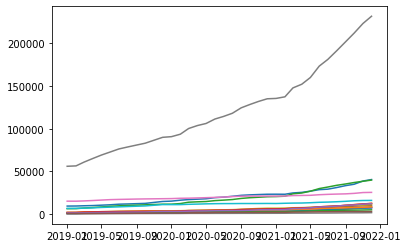

In [36]:
# df_2021 = df[df['기준일'].between('2021-01-01','2021-12-01')]
# df_2020 = df[df['기준일'].between('2020-01-01','2020-12-01')]
# df_2019 = df[df['기준일'].between('2019-01-01','2019-12-01')]

df_total = df[df['기준일'].between('2019-01-01', '2021-12-01')]
df_total['기준일'] = pd.to_datetime(df_total['기준일'])
df_total.set_index('기준일', inplace=True)

plt.plot(df_total)
plt.show()

In [37]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9l0svfj/phqe1lty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9l0svfj/42hiksb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7625', 'data', 'file=/tmp/tmpk9l0svfj/phqe1lty.json', 'init=/tmp/tmpk9l0svfj/42hiksb1.json', 'output', 'file=/tmp/tmpk9l0svfj/prophet_modelw

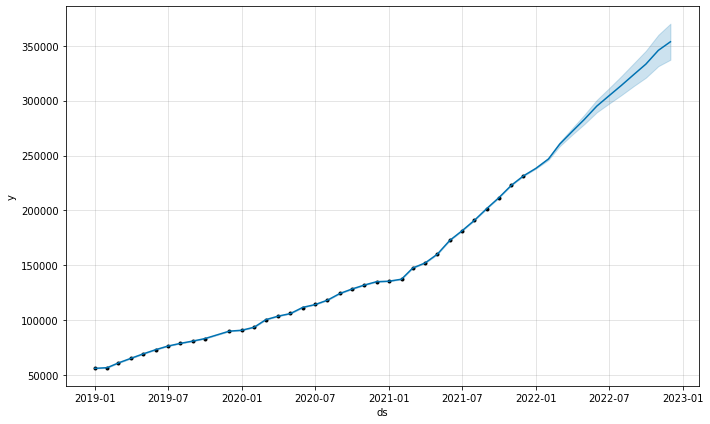

In [38]:
from prophet import Prophet
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'

df_total = df[df['기준일'].between('2019-01-01', '2021-12-01')]
df_total.sort_values('기준일',inplace=True)

df_result = df_total[['기준일','합계']]
df_result.columns = ['ds', 'y']

prophet = Prophet()
prophet.fit(df_result)

future = prophet.make_future_dataframe(periods = 12, freq = 'MS')
prophet.predict(future)

pred = prophet.predict(future)

pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

prophet.plot(pred)
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

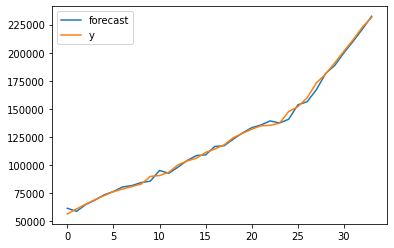

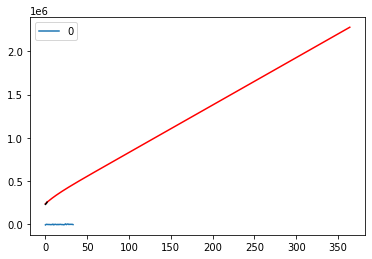

In [39]:
df_total = df[df['기준일'].between('2019-01-01', '2021-12-01')]
df_total.sort_values('기준일',inplace=True)
# print(df_total)

df_2022 = df[df['기준일'].between('2022-01-01', '2022-03-01')]
df_2022.sort_values('기준일',inplace=True)
# print(df_2022)

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df_total['합계'].values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동 을 시각화합니다. (두번째 그래프)
residuals.plot()

forecast_data = model_fit.forecast(steps = 365) # 학습 데이터셋으로부터 3일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
pred_y = forecast_data[0].tolist() # 마지막 3일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = df_2022['합계'].values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)

plt.plot(pred_y, color="red") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="black") # 실제 가격 그래프입니다

### 위경도를 이용하여 전기차 충전소 지도 위의 시각화

> background = GoogleMap

In [40]:
from folium.plugins import MarkerCluster

df = pd.read_csv('/content/한국전력공사_전기차충전소위경도_20220718.csv', encoding='cp949')

# googleMap background set
tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}"
charging_station_map=folium.Map(location = [35.907757, 127.766922], zoom_start = 7, tiles = tiles, attr = 'Google')

df_list = df['시도'].value_counts(sort = False)

In [41]:
# Map 위경도 설정
charging_station_map=folium.Map(location = [35.907757, 127.766922], zoom_start = 7, tiles = tiles, attr = 'Google')

#MarkerCluster 를 이용하면 가까운 거리의 Marker들을 군집시켜서 해당 건수를 표현해준다
marker_cluster = MarkerCluster().add_to(charging_station_map)

for name, lat, lng in zip(df['충전소명'], df['경도'], df['위도']):
  folium.Marker([lat, lng], popup='<b>'+name+'</b>').add_to(marker_cluster)

charging_station_map

강원도        267
경상남도       432
경기도        901
인천광역시      194
경상북도       375
전라남도       272
광주광역시      119
서울특별시      631
대구광역시      259
충청남도       215
대전광역시      142
세종특별자치시     73
부산광역시      185
울산광역시       57
전라북도       215
제주특별자치도    228
충청북도       213
Name: 시도, dtype: int64


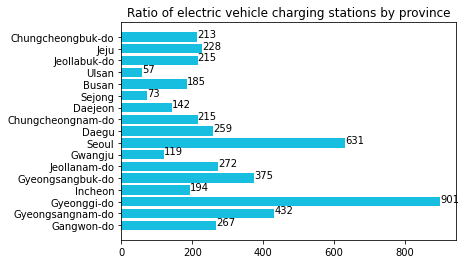

In [42]:
df_columns = ['Gangwon-do', 'Gyeongsangnam-do', 'Gyeonggi-do', 'Incheon', 'Gyeongsangbuk-do', 'Jeollanam-do',
            'Gwangju', 'Seoul', 'Daegu', 'Chungcheongnam-do', 'Daejeon', 'Sejong', 'Busan', 'Ulsan', 'Jeollabuk-do',
            'Jeju','Chungcheongbuk-do']
y = np.arange(len(df_list))

print(df_list)
plt.title("Ratio of electric vehicle charging stations by province")
plt.barh(y, df_list, color='#17bedf')
plt.yticks(y, df_columns)

for idx, value in enumerate(df_list):
    plt.text(value + 0.5, idx, str(value))

plt.show()